In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    RocCurveDisplay,
)
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn import svm, datasets
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv


Gerekli kütüphaneleri import ettim

In [2]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv')

Pandas ile csv verisini okudum

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [4]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [5]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


Dataseti hakkında genel bilgiye sahip olmak için üstteki kod satırlarını kullandım

In [6]:
df.drop(['neo_id','name','orbiting_body'], axis=1, inplace=True)
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


İhtiyacım olmayan ve veri tipinde fazlalık olan sütunları kaldırdım

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 13.2 MB


Kalan verilerim float ve bool tipinde

In [8]:
df['is_hazardous'] = df['is_hazardous'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 15.5 MB


Bool tipindeki veriyi int e çeviriyorum ve böylece Logistic Regression algoritmam rahatlıkla çalışabilir

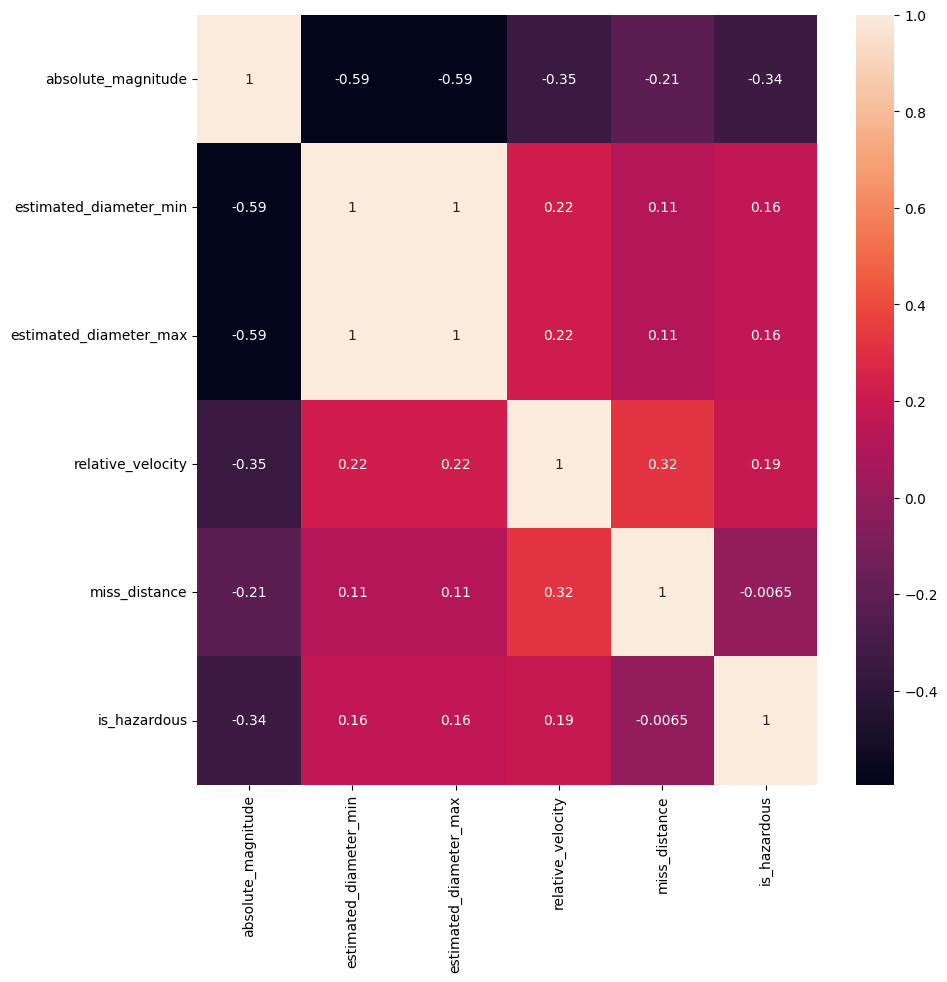

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Korelasyon matrisi çizip hangi veri sütunlarının pozitif ve negatif olduğunu anlıyorum

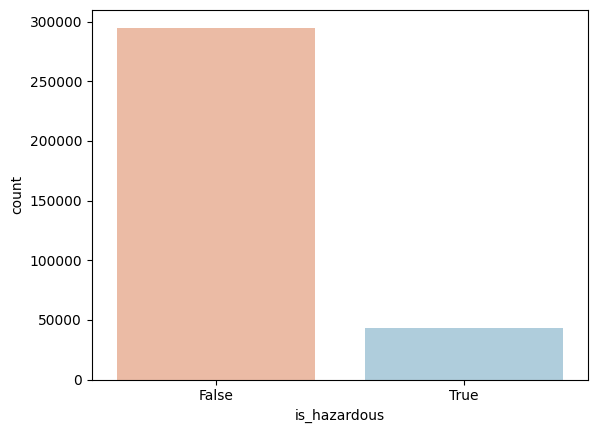

In [10]:
plt.figure()
sns.countplot(x='is_hazardous', data=df, palette='RdBu')
plt.xticks([0,1], ['False', 'True'])
plt.show()

Çalışmak istediğim sütunda NaN veri var mı kontrol ediyorum ve NaN veri olmadığını öğreniyorum

In [11]:
df['is_hazardous'].isnull().any()

False

Diğer verilerde NaN veri var mı kontrol ediyorum çünkü ileride sorun çıkarabilir.

In [12]:
df.isnull().any()

absolute_magnitude         True
estimated_diameter_min     True
estimated_diameter_max     True
relative_velocity         False
miss_distance             False
is_hazardous              False
dtype: bool

3 Sütunda NaN veriler varmış bunları doldurmam gerekiyor

In [13]:
imputer = SimpleImputer(strategy='mean')

NaN verileri doldurmak için SimpleImputer algoritmasını ortalama ('mean') metodu ile kullanıyorum

In [14]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [15]:
df.isnull().any()

absolute_magnitude        False
estimated_diameter_min    False
estimated_diameter_max    False
relative_velocity         False
miss_distance             False
is_hazardous              False
dtype: bool

NaN verilerin tamamını doldurmuş oldum.

In [16]:
X = df.iloc[:, 0:5]
y = df["is_hazardous"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Logistic Regression Algoritmasını datasetine uyguluyorum

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk oranı:", accuracy)

Doğruluk oranı: 0.8724275576581905


%87 başarı oranı hiç fena değil gibi gözüküyor ancak bu veriler dünyaya yakın olan nesnelerin tehlikeli olup olmadığını gösterdiği için geriye kalan %13'lük dilim ölümcül sonuçlar doğurabilir

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
steps = [('scaler', StandardScaler()),
('dec_tree', DecisionTreeClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
params = {"dec_tree__criterion":['gini', 'entropy'],
         "dec_tree__max_depth":np.arange(3, 15)
         }

Decision Tree algoritması ile veri setini daha küçük parçalara bölüyorum

In [19]:
from sklearn.model_selection import GridSearchCV
for cv in range(3,10):
    cv_grid = GridSearchCV(pipeline, param_grid=params,cv=cv)
    cv_grid.fit(X_train, y_train)
    print("%d fold score: %3.2f" %(cv,cv_grid.score(X_test, y_test)))
    print("Best parameters: ", cv_grid.best_params_)

3 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 14}
4 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 14}
5 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 14}
6 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 13}
7 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 14}
8 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 14}
9 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 14}


GridSearch ile baktığımda entropy ve gini kriterleriyle 13 ve 14 derinliklerinin skorda bir değişikliğe sebep olmadığını görüyorum

In [20]:
best_tree = DecisionTreeClassifier(criterion='gini', max_depth=14)
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     59083
         1.0       0.65      0.25      0.36      8557

    accuracy                           0.89     67640
   macro avg       0.77      0.61      0.65     67640
weighted avg       0.87      0.89      0.86     67640



gini kriteri ve 14 derinliğini seçerek skorunu hesaplıyorum ve tehlikesiz olan objeleri %98 başarıyla bulduğunu lakin tehlikeli olanlarda %25'ini doğru tahmin edebildiğini görüyoruz 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)
params = {"dec_tree__criterion":['gini', 'entropy'],
         "dec_tree__max_depth":np.arange(3, 15)
         }
from sklearn.model_selection import GridSearchCV
for cv in range(3,6):
    cv_grid = GridSearchCV(pipeline, param_grid=params,cv=cv)
    cv_grid.fit(X_train, y_train)
    print("%d fold score: %3.2f" %(cv,cv_grid.score(X_test, y_test)))
    print("Best parameters: ", cv_grid.best_params_)

3 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 14}
4 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 13}
5 fold score: 0.89
Best parameters:  {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 14}


Eğitim verisini bir kez daha küçülterek tekrar deniyorum

In [22]:
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=14)
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     29592
         1.0       0.63      0.24      0.35      4228

    accuracy                           0.89     33820
   macro avg       0.77      0.61      0.65     33820
weighted avg       0.87      0.89      0.87     33820



Bu kez 0 sınıfı değişmezken 1 sınıfı %25 den %24 e düştü

Son kez olarak bir değerlendirme yapacak olursak 


Sınıf 0:
Yüksek precision ve recall: Model, sınıf 0 örneklerini oldukça iyi sınıflandırmaktadır. Yanlış pozitif ve yanlış negatif oranları düşüktür.

F1-score da yüksek: Bu, modelin hem precision hem de recall konusunda iyi bir denge sağladığını gösterir.


Sınıf 1:
Düşük recall: Model, sınıf 1 örneklerinin sadece %25'ini doğru bir şekilde sınıflandırabilmektedir. Yani, birçok sınıf 1 örneğini sınıf 0 olarak yanlış sınıflandırmaktadır.

Düşük f1-score: Precision ve recall değerlerinin düşük olması, modelin sınıf 1 örneklerini tahmin etmekte zorlandığını gösterir.


Genel Değerlendirme:
Yüksek genel doğruluk: Modelin genel olarak iyi bir performansı var gibi görünmektedir. Ancak, bu tek başına yeterli bir metrik değildir.

Sınıf dengesizliği: Sınıf 0 örneklerinin sayısı, sınıf 1 örneklerinin sayısından çok daha fazla. Bu durum, modelin genel doğruluk oranını yükseltse de, azınlık sınıfı olan sınıf 1 örneklerinin doğru sınıflandırılmasını zorlaştırabilir.